# Метрические алгоритмы. Метод k ближайших соседей.
Метрические методы основаны на гипотезе компактности, суть которой состоит в том, что объекты с похожими признаковыми описаниями имеют похожие значения целевой переменной. Если эта гипотеза верна, то строить прогноз для нового объекта можно на основе близких к нему объектов из обучающей выборки — например, путем усреднения их ответов (для регрессии) или путем выбора наиболее популярного среди них класса (для классификации). Методы такого типа и называются метрическими. Они имеют несколько особенностей:

Процедура обучения, по сути, отсутствует — достаточно лишь запомнить все объекты обучающей выборки
Можно использовать метрику, учитывающую особенности конкретного набора данных — например, наличие категориальных (номинальных) признаков
При правильном выборе метрики и достаточном размере обучающей выборки метрические алгоритмы показывают качество, близкое к оптимальному
Метрические методы чувствительны к масштабу признаков — так, если масштаб одного из признаков существенно превосходит масштабы остальных признаков, то их значения практически не будут влиять на ответы алгоритма. Поэтому важно производить масштабирование признаков. Обычно это делается путем вычитания среднего значения признака и деления на стандартное отклонение.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [2]:
Columns = ['Target','Alcohol','Malic acid','Ash','Alcalinity of ash', 'Magnesium', 'Total phenols',
           'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue',
           'OD280/OD315 of diluted wines','Proline']

In [3]:
data = pd.read_csv('wine.data', names=Columns)
data.head()

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X = data.drop('Target',axis=1)
y = data['Target']

In [5]:
from sklearn.model_selection import KFold
rang = KFold(n_splits=5, shuffle=True, random_state=42)

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
list_score = list()
for k in range(1,51):
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(estimator=model, X=X, y=y, cv=rang,scoring='accuracy')
    list_score.append(score.mean())

Text(0.5,1,'without scale')

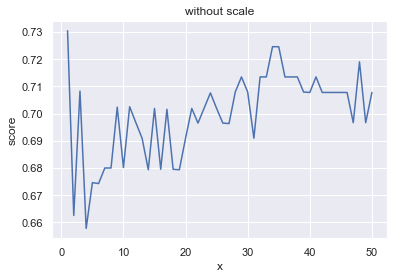

In [27]:
X_plot = np.linspace(1,50,50)
plt.plot(X_plot, list_score)
plt.xlabel('x')
plt.ylabel('score')
plt.title('without scale')

In [28]:
score = np.array(list_score)

In [29]:
argmax = score.argmax() + 1
scoremax = np.round(score.max(),2) 
print argmax
print scoremax
f = open('answer1.txt', 'w')
f.write(str(argmax))
f.close()
f = open('answer2.txt', 'w')
f.write(str(scoremax))
f.close()

1
0.73


In [18]:
from sklearn.preprocessing import scale
X_TR = scale(X=X)

C:\Users\Vladuk\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [21]:
list_score = list()
for k in range(1,51):
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(estimator=model, X=X_TR, y=y, cv=rang,scoring='accuracy')
    list_score.append(score.mean())

Text(0.5,1,'without scale')

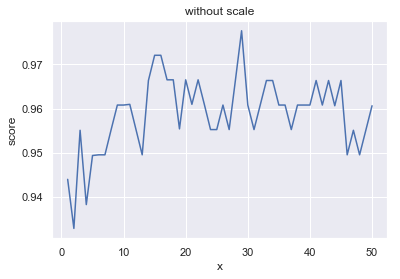

In [22]:
X_plot = np.linspace(1,50,50)
plt.plot(X_plot, list_score)
plt.xlabel('x')
plt.ylabel('score')
plt.title('without scale')

In [24]:
score = np.array(list_score)
argmax = score.argmax() + 1
scoremax = np.round(score.max(),2)
print argmax
print scoremax
f = open('answer3.txt', 'w')
f.write(str(argmax))
f.close()
f = open('answer4.txt', 'w')
f.write(str(scoremax))
f.close()

29
0.98
